In [3]:
from sklearn import datasets
iris=datasets.load_iris()

In [8]:
print('target names : ',iris.target_names)
print('feature names: ',iris.feature_names)

target names :  ['setosa' 'versicolor' 'virginica']
feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [10]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
type(iris.data),type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#making dataframe from this
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

In [15]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
X = df.iloc[:, :-1]  # features
y = df.iloc[:, -1]   # target

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

In [20]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [22]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier().fit(X_train,y_train)

In [30]:
#chances
pd.DataFrame(data=model.predict_proba(X_test), columns=iris.target_names)

,setosa,versicolor,virginica
0,0.0,0.01,0.99
1,0.0,0.91,0.09
2,1.0,0.00,0.00
3,0.0,0.00,1.00
4,1.0,0.00,0.00
5,0.0,0.00,1.00
6,1.0,0.00,0.00
7,0.0,0.98,0.02
8,0.0,0.87,0.13
9,0.0,0.97,0.03


In [46]:
feature_imp=pd.Series(model.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.450771
petal length (cm)    0.424510
sepal length (cm)    0.101406
sepal width (cm)     0.023314
dtype: float64

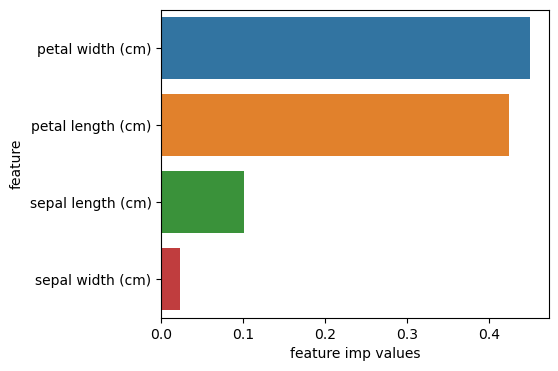

In [53]:
plt.figure(figsize=(5,4))
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('feature imp values')
plt.ylabel('feature')
plt.show()

In [31]:
y_pred=model.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix,classification_report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [41]:
len(model.estimators_)

100

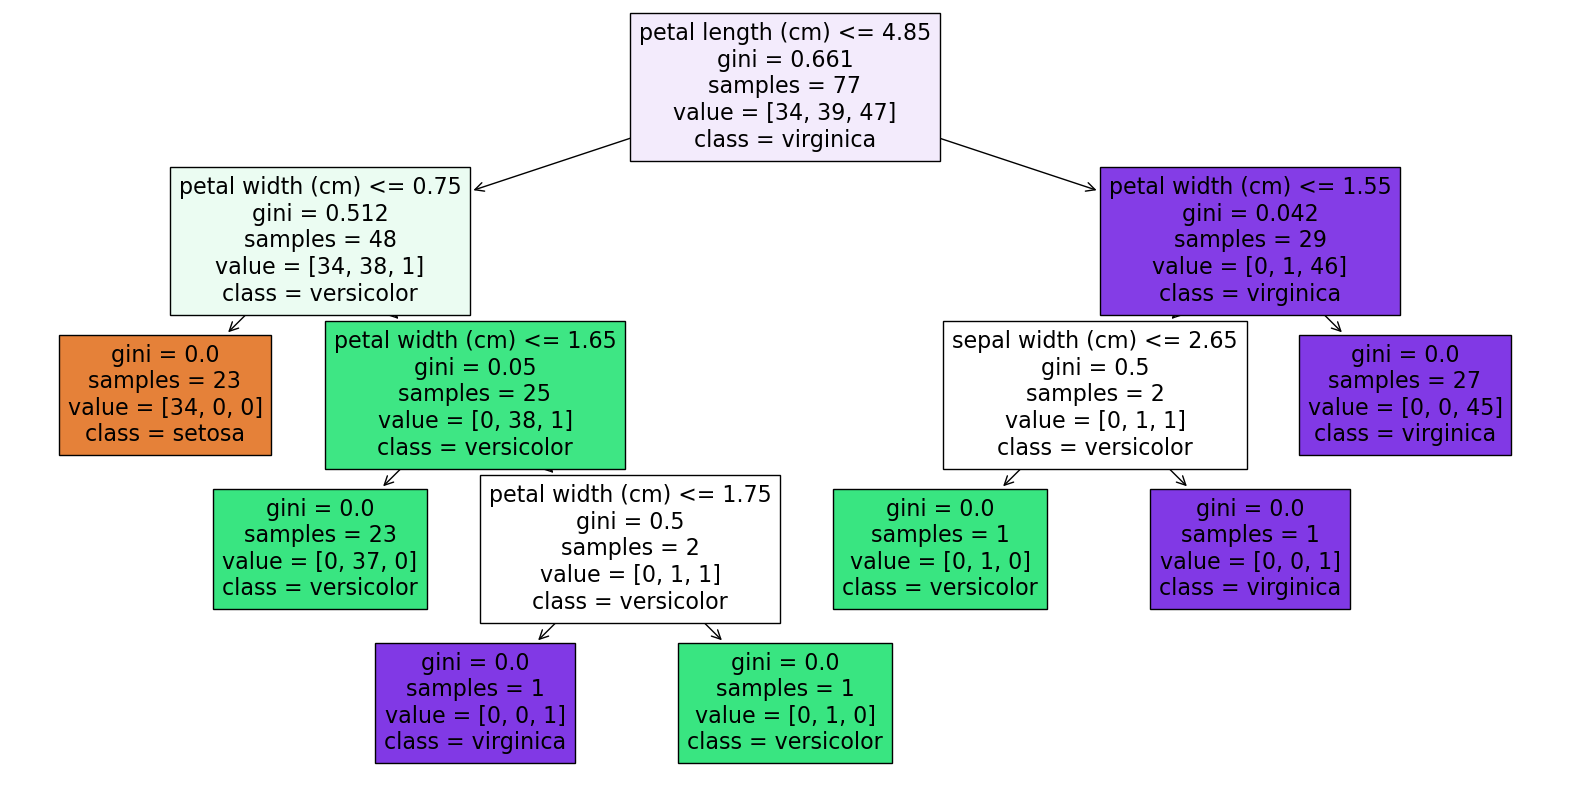

In [42]:
#here 100 trees here i am ploting first tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()